In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import warnings

warnings.simplefilter('ignore')

# 2.重回帰
### 重回帰とは
前章では説明変数が１次の単回帰について取り扱った。しかし説明変数が１次、つまり直線$y=ax+b$へのフィッティングでは十分な回帰性能を得られない可能性がある。そこで本章では説明変数を２つ以上に増やし分析を行う。この方法を単回帰と区別して**重回帰**と呼ぶ。

# 重回帰モデル
重回帰で用いるモデルは一般に以下のような多項式である。
$$
\hat{y} = w_{0} + w_{1}x + w_{2}x^{2} + w_{3}x^{3} + \cdots + w_{d}x^{d}
$$
また、$w_{0}, w_{1}, w_{2}, w_{3}, \cdots , w_{d}$はモデルの**重み**で、この値を求めいていくことになる。
ここで式をより扱いやすくするために以下のように各パラメータを列ベクトルで表現する。
$d$個の説明変数を並べたベクトル$\boldsymbol{x}$は
$$
\begin{gather}
    \boldsymbol{x} = \begin{pmatrix} 
        x_{1}\\ 
        \vdots \\ 
        x_{d} \\ 
        \notag 
        \end{pmatrix}
\end{gather}
$$
重みも同様にして  
$$
\begin{gather}
    \boldsymbol{w} = \begin{pmatrix}
        w_{1}\\
        \vdots \\
        w_{d} \\
        \notag
        \end{pmatrix}
\end{gather}
$$
また予測値$y_{i}$をN個並べた目的変数ベクトル$\boldsymbol{\hat{y}}$は
$$
\begin{gather}
    \boldsymbol{\boldsymbol{\hat{y}}} = 
        \begin{pmatrix}
        y_{1}\\
        \vdots \\
        y_{\tiny N} \\
        \notag
        \end{pmatrix}
\end{gather}
$$
また単回帰と同様に$N$個の事例からなるデータ$D$は
$$
\begin{align}
\mathcal{D} = \left\{(\boldsymbol{x}_1, y_1), (\boldsymbol{x}_2, y_2), \dots, (\boldsymbol{x}_N, y_N)\right\} = \left
\{(\boldsymbol{x}_i, y_i)\right\}_{i=1}^{N} \notag
\end{align}
$$
$N$個の説明変数を行列にまとめると、
$$
\begin{align}
\boldsymbol{X} = \begin{pmatrix}
\boldsymbol{x}_1^\top \\
\boldsymbol{x}_2^\top \\
\vdots \\
\boldsymbol{x}_N^\top \\
\end{pmatrix}
= \begin{pmatrix}
X_{1,1} & X_{1,2} & \dots & X_{1,d} \\
X_{2,1} & X_{2,2} & \dots & X_{2,d} \\
\vdots & \vdots & \ddots & \vdots \\
X_{N,1} & X_{N,2} & \dots & X_{N,d} \notag
\end{pmatrix}
\end{align}
$$
この行列は特に**計画行列**という。
よって目的変数$\boldsymbol{\hat{y}}$は以下のように表される。
$$
\boldsymbol{\hat{y}} = \boldsymbol{X}\boldsymbol{w}
$$

### パラメータ推定
単回帰と同様に残差を使用し最小2乗法によってパラメータを推定していく。
目的変数の実測値$y_{i}$とモデルの予測値$\hat{y}_{i}$の差$\epsilon_{i}$は
$$
\epsilon_{i} = y_{i} - \hat{y}_{i} = y_{i} - \boldsymbol{X}\boldsymbol{w}
$$
よって学習データにおける平均二乗誤差$\hat{L}$は
$$
\begin{align}
\hat{L} = \frac{1}{N} \sum_{i=1}^{N} \epsilon_i^2 = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 = 
  \frac{1}{N} \sum_{i=1}^{N} (y_i - \boldsymbol{x}_i^\top\boldsymbol{w})^2 \notag
\end{align} 
$$
またすべての事例の残差をベクトル$\boldsymbol{\epsilon}$は
$$
\begin{gather}
    \boldsymbol{\epsilon} = 
        \begin{pmatrix}
        \epsilon_{1}\\
        \vdots \\
        \epsilon_{d} \\
        \notag
        \end{pmatrix}
\end{gather}
$$
となるので、重回帰の目的関数$\hat{L}_{D}(\boldsymbol{w})$は
$$
\begin{align}
\hat{L}_{\mathcal{D}}(\boldsymbol{w}) = \lVert \boldsymbol{\epsilon} \rVert^2 = \lVert \boldsymbol{y} - \boldsymbol{X}\boldsymbol{w} \rVert^2  \notag
\end{align}
$$
これを最小化したいので偏微分を求めその値を0と置き、パラメータ$\boldsymbol{w}$を求める式を導出する。
目的関数より、
$$
\begin{align}
\hat{L}_{\mathcal{D}}(\boldsymbol{w}) &= \lVert \boldsymbol{y} - \boldsymbol{X}\boldsymbol{w} \rVert^2 \notag \\ 
&= (\boldsymbol{y} - \boldsymbol{X}\boldsymbol{w})^\top(\boldsymbol{y} - \boldsymbol{X}\boldsymbol{w}) \notag \\ 
&= \boldsymbol{y}^\top \boldsymbol{y} - \boldsymbol{y}^\top \boldsymbol{X}\boldsymbol{w} - \boldsymbol{w}^\top \boldsymbol{X}^\top \boldsymbol{y} + \boldsymbol{w}^\top \boldsymbol{X}^\top \boldsymbol{X}\boldsymbol{w} \notag \\  
&= \boldsymbol{y}^\top \boldsymbol{y} - 2(\boldsymbol{X}^\top\boldsymbol{y})^\top \boldsymbol{w} + \boldsymbol{w}^\top \boldsymbol{X}^\top \boldsymbol{X}\boldsymbol{w}\notag
\end{align} 
$$
$\boldsymbol{w}$について偏微分すると、
$$
\begin{align}
\nabla \hat{L}_{\mathcal{D}}(\boldsymbol{w}) 
  &= 0 - 2\boldsymbol{X}^\top \boldsymbol{y} +  2\boldsymbol{X}^\top \boldsymbol{X}\boldsymbol{w} \notag
  = 2\boldsymbol{X}^\top (\boldsymbol{X}\boldsymbol{w} - \boldsymbol{y})
\end{align}
$$
これを$\boldsymbol{0}$と置くと、
$$
\begin{align}
\nabla \hat{L}_{\mathcal{D}}(\boldsymbol{w}) &= \boldsymbol{0} \notag \\
2\boldsymbol{X}^\top (\boldsymbol{X}\boldsymbol{w} - \boldsymbol{y}) &= \boldsymbol{0} \notag \\
\boldsymbol{X}^\top \boldsymbol{X}\boldsymbol{w} &= \boldsymbol{X}^\top \boldsymbol{y} \notag \\
\boldsymbol{w} &= (\boldsymbol{X}^\top \boldsymbol{X})^{-1}\boldsymbol{X}^\top \boldsymbol{y} \notag 
\end{align}
$$

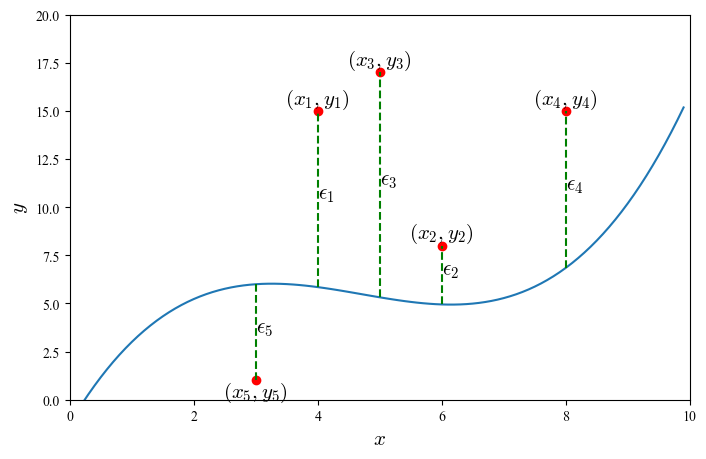

In [10]:
data = np.array([[4, 15], [6, 8], [5, 17], [8, 15], [3, 1]])

#ここでパラメータを変更
w0 = -1.23
w1 = 5.41
w2 = -1.27
w3 = 0.09


x = np.arange(0, 10, 0.1)
y = w0 + w1 * x + w2 * x**2 + w3 * x**3

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'

ax.plot(x, y)
ax.scatter(data[:, 0], data[:, 1], color='red')
for i, x in enumerate(data[:, 0]):
    y_hat = w0 + w1 * x + w2 * x**2 + w3 * x**3
    if max(y_hat, data[i, 1]) == data[i, 1]:
        ax.text(data[i, 0], data[i, 1], f'$(x_{i+1}, y_{i+1})$', ha='center', va='bottom', size=15)
    else:
        ax.text(data[i, 0], data[i, 1], f'$(x_{i+1}, y_{i+1})$', ha='center', va='top', size=15)
    ax.vlines([x], ymin=min(y_hat, data[i, 1]), ymax=max(y_hat, data[i, 1]), color='green', linestyles='dashed')
    ax.text(data[i, 0], (data[i, 1] + y_hat) / 2, f'$\epsilon_{i+1}$', ha='left', size=15)

ax.set_xlim(0, 10)
ax.set_ylim(0, 20)
ax.set_xlabel(r'$x$', fontsize=15)
ax.set_ylabel(r'$y$', fontsize=15)
plt.show()